## EXPERIMENT 2.3: AdaFace

In [36]:
## Load libraries

import numpy as np
import cv2
from matplotlib import pyplot as plt
import torch
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import normalize
import sys
sns.set(style="white")
%matplotlib inline
sys.path.append('../../utils')
from Model_utils.Model_funcs import *
from Result_metric_utils.result_metrics import *
from Data_proc_utils.Data_proc_funcs import *
from Plotting_stats_utils.plotting_threshold import compute_metrics_ex_2_3, plot_threshold_metrics_ex_2_3
from Plotting_stats_utils.stats_tables import *


from IPython import embed


In [37]:
# Save figures
from matplotlib import pyplot as plt
save_fig_path = '../../figures/mag_2_3/'

### AdaFace Results

This notebook loads the feature vectors from MagFace and run them through the results metrics:
FNIR, FPIR, FND, FPD, and GARBE

In [38]:
feature_list_children = '../../data/data_full/feature_vectors/magface_feature_vectors/2.2/feature_vectors_from_children_filtered_bibel_FINAL_INFERENCE_finetuning_ex_2_2_ofsi_final.list'

# feature_list_children = '../../data/data_full/feature_vectors/magface_feature_vectors/1.1/feature_vectors_from_children_filtered_bibel_FINAL_INFERENCE_baseline_ex_1_1.list'


def load_and_compute_similarity(feature_list, dtype=np.float32):
    # Load data
    image_names, ids, num_ids, norm_feats = load_magface_vectors(feature_list)

    # Convert dtype to reduce memory usage
    norm_feats = norm_feats.astype(dtype)

    # Compute similarity matrix incrementally if possible
    sim_mat = np.dot(norm_feats, norm_feats.T)

    return image_names, ids, num_ids, sim_mat


In [39]:
# # feature_list_children = '../../data/data_full/feature_vectors/adaface_feature_vectors/2.2/similarity_scores_children_bibel_FINAL_INFERENCE_finetuning_2_2.pt'
# feature_list_children = '../../data/data_full/feature_vectors/adaface_feature_vectors/2.1/similarity_scores_children_filtered_bibel_FINAL_INFERENCE_finetuning_frozen_9_layers_2_1.pt'


# image_names_all, ids_all, num_ids_all, norm_feats_all = load_adaface_vectors(feature_list_children)


# # Similarity matrices from adaface - all
# sim_mat_all = np.dot(norm_feats_all, norm_feats_all.T)


# # Dataframes with info, removes names not in magface results
# children_all = pd.read_csv('../../data/image_info_csvs/final_filtered_canonical_df_BIBLE.csv')
# children_all = children_all[children_all.image_name.isin(image_names_all)]



image_names_all, ids_all, num_ids_all, sim_mat_all = load_and_compute_similarity(feature_list_children)

# Dataframes with info, removes names not in magface results
# children_all = pd.read_csv('../../data/image_info_csvs/final_filtered_children_df_BIBEL.csv')
children_all = pd.read_csv('../../data/image_info_csvs/final_filtered_canonical_df_BIBLE.csv')
children_all = children_all[children_all.image_name.isin(image_names_all)]


/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_5.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_1.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_2.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_m.04n3v0_/m.04n3v0__0002.jpg
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_1.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_3.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_2.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_344/Asian_344_19.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_344/Asian_344_21.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_167/Caucasian_167_26.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_167/Caucasian_167_38.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_16

# Finding the right threshold

In [40]:
random_states = [1,2]
percentiles = np.arange(0.0, 1.0, 0.03).tolist()

df_all_threshold_x = compute_metrics_ex_2_3(random_states, percentiles, children_all, children_all, image_names_all, image_names_all, sim_mat_all, sim_mat_all, num_ids_all, num_ids_all, ids_all, ids_all, balance_child_data, balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, '1-3', '4-6')

# df_all_threshold_x = compute_metrics_ex_2_3(random_states, percentiles, children_all, children_all, image_names_all, image_names_all, sim_mat_all, sim_mat_all, num_ids_all, num_ids_all, ids_all, ids_all, balance_child_data, balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, '1-3', '4-6')

/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:10: RuntimeWarning: invalid value encountered in scalar divide
  FPD = (np.abs(fpir_c -fpir_a)/(2*(2**2)*((fnir_c+fnir_a)/2)))*2
/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:16: RuntimeWarning: invalid value encountered in scalar divide
  FND = ((np.abs(fnir_c -fnir_a))/(2*(2**2)*((fnir_c+fnir_a)/2)))*2


FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.0
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.03
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.06
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.09
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.12
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.15
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.18
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more u

/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:10: RuntimeWarning: invalid value encountered in scalar divide
  FPD = (np.abs(fpir_c -fpir_a)/(2*(2**2)*((fnir_c+fnir_a)/2)))*2
/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:16: RuntimeWarning: invalid value encountered in scalar divide
  FND = ((np.abs(fnir_c -fnir_a))/(2*(2**2)*((fnir_c+fnir_a)/2)))*2


FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.0
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.03
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.06
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.09
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.12
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.15
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 2, percentile: 0.18
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more

In [41]:
random_states = [1,2]
percentiles = np.arange(0.0, 1.0, 0.03).tolist()

df_all_threshold_x_1 = compute_metrics_ex_2_3(random_states, percentiles, children_all, children_all, image_names_all, image_names_all, sim_mat_all, sim_mat_all, num_ids_all, num_ids_all, ids_all, ids_all, balance_child_data, balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, '7-9', '10-12')


/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:10: RuntimeWarning: invalid value encountered in scalar divide
  FPD = (np.abs(fpir_c -fpir_a)/(2*(2**2)*((fnir_c+fnir_a)/2)))*2
/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:16: RuntimeWarning: invalid value encountered in scalar divide
  FND = ((np.abs(fnir_c -fnir_a))/(2*(2**2)*((fnir_c+fnir_a)/2)))*2


FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.0
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.03
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.06
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.09
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.12
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.15
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.18
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more u

/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:10: RuntimeWarning: invalid value encountered in scalar divide
  FPD = (np.abs(fpir_c -fpir_a)/(2*(2**2)*((fnir_c+fnir_a)/2)))*2
/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:16: RuntimeWarning: invalid value encountered in scalar divide
  FND = ((np.abs(fnir_c -fnir_a))/(2*(2**2)*((fnir_c+fnir_a)/2)))*2


FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.0
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.03
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.06
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.09
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.12
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.15
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.18
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more u

In [42]:
random_states = [1,2]
percentiles = np.arange(0.0, 1.0, 0.03).tolist()

df_all_threshold_x_2 = compute_metrics_ex_2_3(random_states, percentiles, children_all, children_all, image_names_all, image_names_all, sim_mat_all, sim_mat_all, num_ids_all, num_ids_all, ids_all, ids_all, balance_child_data, balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, '13-15', '1-3')


/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:10: RuntimeWarning: invalid value encountered in scalar divide
  FPD = (np.abs(fpir_c -fpir_a)/(2*(2**2)*((fnir_c+fnir_a)/2)))*2
/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:16: RuntimeWarning: invalid value encountered in scalar divide
  FND = ((np.abs(fnir_c -fnir_a))/(2*(2**2)*((fnir_c+fnir_a)/2)))*2


FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.0
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.03
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.06
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.09
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.12
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.15
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.18
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more u

/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:10: RuntimeWarning: invalid value encountered in scalar divide
  FPD = (np.abs(fpir_c -fpir_a)/(2*(2**2)*((fnir_c+fnir_a)/2)))*2
/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:16: RuntimeWarning: invalid value encountered in scalar divide
  FND = ((np.abs(fnir_c -fnir_a))/(2*(2**2)*((fnir_c+fnir_a)/2)))*2


FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.0
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.03
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.06
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.09
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.12
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.15
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 2, percentile: 0.18
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more

In [43]:
df_all_threshold_x

,Iteration,Percentile,FNIR_c,FNIR_a,FPIR_c,FPIR_a,FPD,FND,GARBE,Threshold
0,1,0.00,0.000000,0.000000,1.0,1.0,NaN,NaN,NaN,0.00
1,1,0.03,0.000000,0.000000,1.0,1.0,NaN,NaN,NaN,0.03
2,1,0.06,0.000000,0.000000,1.0,1.0,NaN,NaN,NaN,0.06
3,1,0.09,0.000000,0.000000,1.0,1.0,NaN,NaN,NaN,0.09
4,1,0.12,0.000000,0.000000,1.0,1.0,NaN,NaN,NaN,0.12
...,...,...,...,...,...,...,...,...,...,...
63,2,0.87,0.562069,0.583673,0.0,0.0,0.0,0.009428,0.007071,0.87
64,2,0.90,0.579310,0.583673,0.0,0.0,0.0,0.001876,0.001407,0.90
65,2,0.93,0.579310,0.591837,0.0,0.0,0.0,0.005348,0.004011,0.93
66,2,0.96,0.579310,0.600000,0.0,0.0,0.0,0.008772,0.006579,0.96


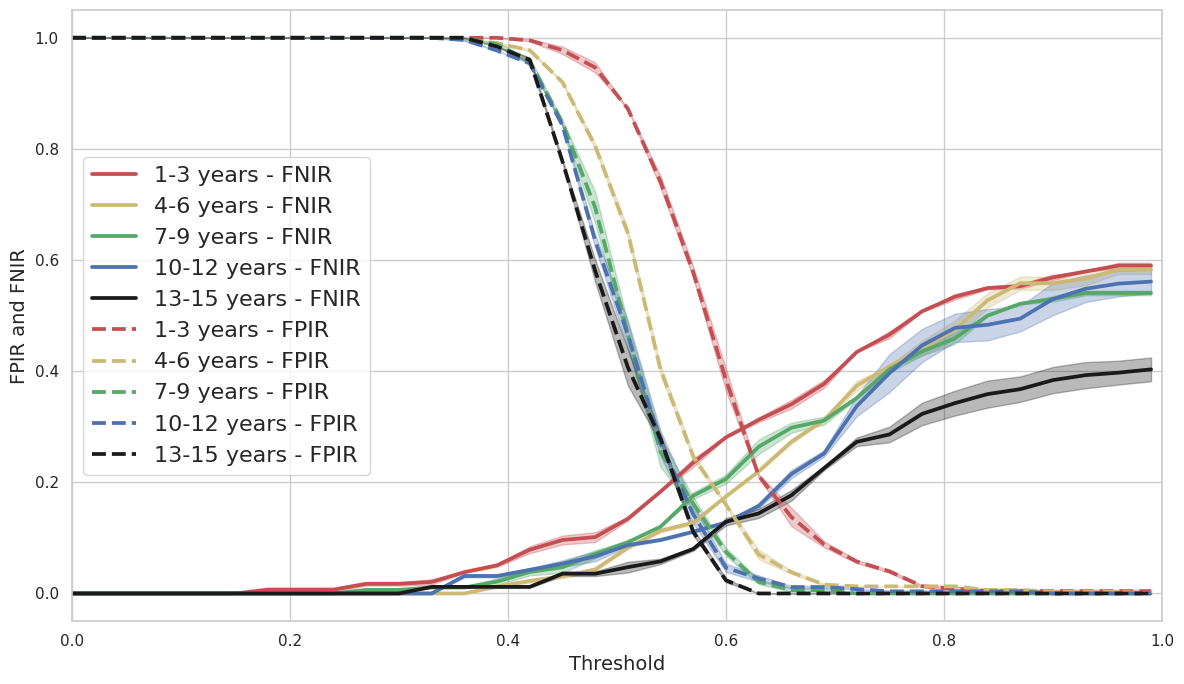

In [44]:
# plot_threshold_metrics_ex_2_3(df_all_threshold_x, df_all_threshold_x_1,df_all_threshold_x_2, save_fig_path )

def plot_threshold_metrics_ex_2_3_w_conf(df_all_threshold_x, df_all_threshold_x_1, df_all_threshold_x_2, save_fig_path):
    # Set the aesthetics for the plots
    sns.set(style="whitegrid")

    def calculate_ci(df, column):
        """Calculate the 95% confidence interval for a column in the DataFrame."""
        mean = df[column].mean()
        std = df[column].std()
        count = df[column].count()
        ci = 1.96 * (std / count**0.5)
        return mean, ci

    # Prepare the data with confidence intervals
    plot_df = df_all_threshold_x.groupby('Threshold').agg(['mean', 'std'])
    plot_df_1 = df_all_threshold_x_1.groupby('Threshold').agg(['mean', 'std'])
    plot_df_2 = df_all_threshold_x_2.groupby('Threshold').agg(['mean', 'std'])

    plt.figure(figsize=(12, 7))

    # Plot FNIR with confidence intervals
    plt.plot(plot_df.index, plot_df['FNIR_c']['mean'], 'r-', label='1-3 years - FNIR', linewidth=2.7)
    plt.fill_between(plot_df.index, plot_df['FNIR_c']['mean'] - 1.96 * plot_df['FNIR_c']['std'] / plot_df['FNIR_c']['mean'].count()**0.5,
                     plot_df['FNIR_c']['mean'] + 1.96 * plot_df['FNIR_c']['std'] / plot_df['FNIR_c']['mean'].count()**0.5, color='r', alpha=0.3)
    plt.plot(plot_df.index, plot_df['FNIR_a']['mean'], 'y-', label='4-6 years - FNIR', linewidth=2.7)
    plt.fill_between(plot_df.index, plot_df['FNIR_a']['mean'] - 1.96 * plot_df['FNIR_a']['std'] / plot_df['FNIR_a']['mean'].count()**0.5,
                     plot_df['FNIR_a']['mean'] + 1.96 * plot_df['FNIR_a']['std'] / plot_df['FNIR_a']['mean'].count()**0.5, color='y', alpha=0.3)
    plt.plot(plot_df_1.index, plot_df_1['FNIR_c']['mean'], 'g-', label='7-9 years - FNIR', linewidth=2.7)
    plt.fill_between(plot_df_1.index, plot_df_1['FNIR_c']['mean'] - 1.96 * plot_df_1['FNIR_c']['std'] / plot_df_1['FNIR_c']['mean'].count()**0.5,
                     plot_df_1['FNIR_c']['mean'] + 1.96 * plot_df_1['FNIR_c']['std'] / plot_df_1['FNIR_c']['mean'].count()**0.5, color='g', alpha=0.3)
    plt.plot(plot_df_1.index, plot_df_1['FNIR_a']['mean'], 'b-', label='10-12 years - FNIR', linewidth=2.7)
    plt.fill_between(plot_df_1.index, plot_df_1['FNIR_a']['mean'] - 1.96 * plot_df_1['FNIR_a']['std'] / plot_df_1['FNIR_a']['mean'].count()**0.5,
                     plot_df_1['FNIR_a']['mean'] + 1.96 * plot_df_1['FNIR_a']['std'] / plot_df_1['FNIR_a']['mean'].count()**0.5, color='b', alpha=0.3)
    plt.plot(plot_df_2.index, plot_df_2['FNIR_c']['mean'], 'k-', label='13-15 years - FNIR', linewidth=2.7)
    plt.fill_between(plot_df_2.index, plot_df_2['FNIR_c']['mean'] - 1.96 * plot_df_2['FNIR_c']['std'] / plot_df_2['FNIR_c']['mean'].count()**0.5,
                     plot_df_2['FNIR_c']['mean'] + 1.96 * plot_df_2['FNIR_c']['std'] / plot_df_2['FNIR_c']['mean'].count()**0.5, color='k', alpha=0.3)

    plt.xlabel('Threshold', fontsize=14)
    plt.ylabel('FNIR and FPIR', fontsize=14)
    # plt.title('FNIR vs Threshold', fontsize=16)
    plt.xlim(0.0, 1)
    plt.legend(fontsize=16)
    plt.grid(True)

    # Plot FPIR with confidence intervals
    plt.plot(plot_df.index, plot_df['FPIR_c']['mean'], 'r--', label='1-3 years - FPIR', linewidth=2.7)
    plt.fill_between(plot_df.index, plot_df['FPIR_c']['mean'] - 1.96 * plot_df['FPIR_c']['std'] / plot_df['FPIR_c']['mean'].count()**0.5,
                     plot_df['FPIR_c']['mean'] + 1.96 * plot_df['FPIR_c']['std'] / plot_df['FPIR_c']['mean'].count()**0.5, color='r', alpha=0.3)
    plt.plot(plot_df.index, plot_df['FPIR_a']['mean'], 'y--', label='4-6 years - FPIR', linewidth=2.7)
    plt.fill_between(plot_df.index, plot_df['FPIR_a']['mean'] - 1.96 * plot_df['FPIR_a']['std'] / plot_df['FPIR_a']['mean'].count()**0.5,
                     plot_df['FPIR_a']['mean'] + 1.96 * plot_df['FPIR_a']['std'] / plot_df['FPIR_a']['mean'].count()**0.5, color='y', alpha=0.3)
    plt.plot(plot_df_1.index, plot_df_1['FPIR_c']['mean'], 'g--', label='7-9 years - FPIR', linewidth=2.7)
    plt.fill_between(plot_df_1.index, plot_df_1['FPIR_c']['mean'] - 1.96 * plot_df_1['FPIR_c']['std'] / plot_df_1['FPIR_c']['mean'].count()**0.5,
                     plot_df_1['FPIR_c']['mean'] + 1.96 * plot_df_1['FPIR_c']['std'] / plot_df_1['FPIR_c']['mean'].count()**0.5, color='g', alpha=0.3)
    plt.plot(plot_df_1.index, plot_df_1['FPIR_a']['mean'], 'b--', label='10-12 years - FPIR', linewidth=2.7)
    plt.fill_between(plot_df_1.index, plot_df_1['FPIR_a']['mean'] - 1.96 * plot_df_1['FPIR_a']['std'] / plot_df_1['FPIR_a']['mean'].count()**0.5,
                     plot_df_1['FPIR_a']['mean'] + 1.96 * plot_df_1['FPIR_a']['std'] / plot_df_1['FPIR_a']['mean'].count()**0.5, color='b', alpha=0.3)
    plt.plot(plot_df_2.index, plot_df_2['FPIR_c']['mean'], 'k--', label='13-15 years - FPIR', linewidth=2.7)
    plt.fill_between(plot_df_2.index, plot_df_2['FPIR_c']['mean'] - 1.96 * plot_df_2['FPIR_c']['std'] / plot_df_2['FPIR_c']['mean'].count()**0.5,
                     plot_df_2['FPIR_c']['mean'] + 1.96 * plot_df_2['FPIR_c']['std'] / plot_df_2['FPIR_c']['mean'].count()**0.5, color='k', alpha=0.3)

    plt.xlabel('Threshold', fontsize=14)
    plt.ylabel('FPIR and FNIR', fontsize=14)
    # plt.title('FPIR and FNIR vs Threshold', fontsize=16)
    plt.xlim(0.0, 1)
    plt.legend(fontsize=16)
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(f'{save_fig_path}TH.png')

    # Show the plot
    plt.show()
plot_threshold_metrics_ex_2_3_w_conf(df_all_threshold_x, df_all_threshold_x_1,df_all_threshold_x_2, save_fig_path )

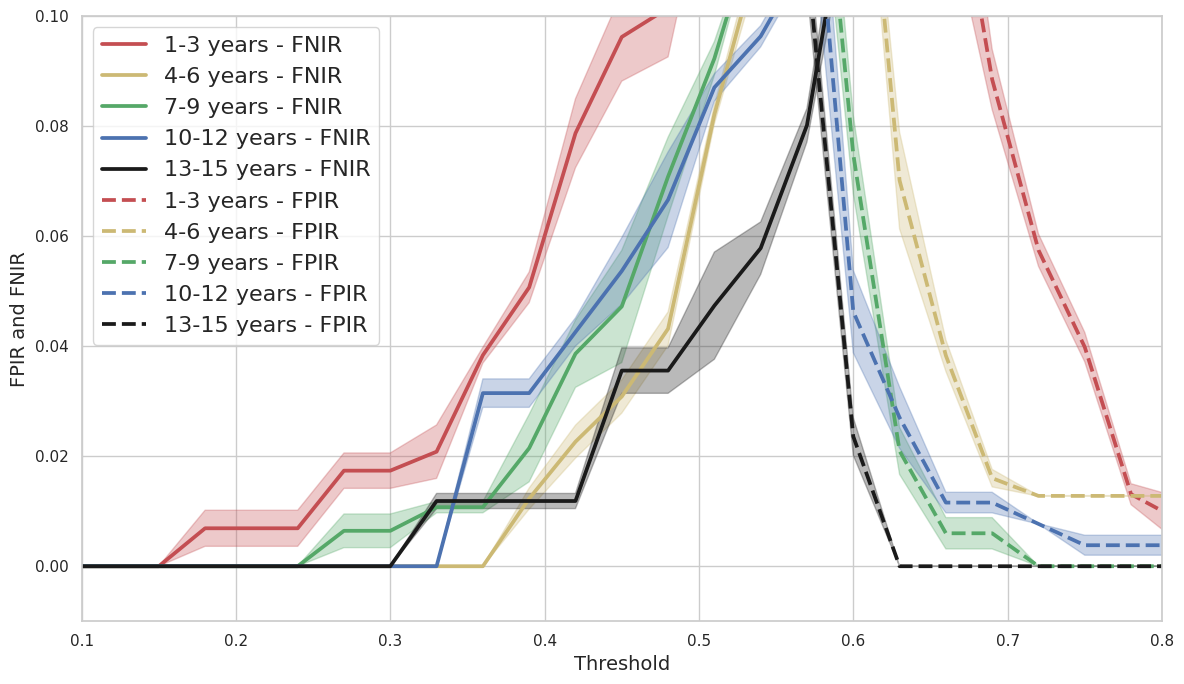

In [45]:

def plot_threshold_metrics_ex_2_3_w_conf_zoomed(df_all_threshold_x, df_all_threshold_x_1, df_all_threshold_x_2, save_fig_path):
    # Set the aesthetics for the plots
    sns.set(style="whitegrid")

    def calculate_ci(df, column):
        """Calculate the 95% confidence interval for a column in the DataFrame."""
        mean = df[column].mean()
        std = df[column].std()
        count = df[column].count()
        ci = 1.96 * (std / count**0.5)
        return mean, ci

    # Prepare the data with confidence intervals
    plot_df = df_all_threshold_x.groupby('Threshold').agg(['mean', 'std'])
    plot_df_1 = df_all_threshold_x_1.groupby('Threshold').agg(['mean', 'std'])
    plot_df_2 = df_all_threshold_x_2.groupby('Threshold').agg(['mean', 'std'])

    plt.figure(figsize=(12, 7))

    # Plot FNIR with confidence intervals
    plt.plot(plot_df.index, plot_df['FNIR_c']['mean'], 'r-', label='1-3 years - FNIR', linewidth=2.7)
    plt.fill_between(plot_df.index, plot_df['FNIR_c']['mean'] - 1.96 * plot_df['FNIR_c']['std'] / plot_df['FNIR_c']['mean'].count()**0.5,
                     plot_df['FNIR_c']['mean'] + 1.96 * plot_df['FNIR_c']['std'] / plot_df['FNIR_c']['mean'].count()**0.5, color='r', alpha=0.3)
    plt.plot(plot_df.index, plot_df['FNIR_a']['mean'], 'y-', label='4-6 years - FNIR', linewidth=2.7)
    plt.fill_between(plot_df.index, plot_df['FNIR_a']['mean'] - 1.96 * plot_df['FNIR_a']['std'] / plot_df['FNIR_a']['mean'].count()**0.5,
                     plot_df['FNIR_a']['mean'] + 1.96 * plot_df['FNIR_a']['std'] / plot_df['FNIR_a']['mean'].count()**0.5, color='y', alpha=0.3)
    plt.plot(plot_df_1.index, plot_df_1['FNIR_c']['mean'], 'g-', label='7-9 years - FNIR', linewidth=2.7)
    plt.fill_between(plot_df_1.index, plot_df_1['FNIR_c']['mean'] - 1.96 * plot_df_1['FNIR_c']['std'] / plot_df_1['FNIR_c']['mean'].count()**0.5,
                     plot_df_1['FNIR_c']['mean'] + 1.96 * plot_df_1['FNIR_c']['std'] / plot_df_1['FNIR_c']['mean'].count()**0.5, color='g', alpha=0.3)
    plt.plot(plot_df_1.index, plot_df_1['FNIR_a']['mean'], 'b-', label='10-12 years - FNIR', linewidth=2.7)
    plt.fill_between(plot_df_1.index, plot_df_1['FNIR_a']['mean'] - 1.96 * plot_df_1['FNIR_a']['std'] / plot_df_1['FNIR_a']['mean'].count()**0.5,
                     plot_df_1['FNIR_a']['mean'] + 1.96 * plot_df_1['FNIR_a']['std'] / plot_df_1['FNIR_a']['mean'].count()**0.5, color='b', alpha=0.3)
    plt.plot(plot_df_2.index, plot_df_2['FNIR_c']['mean'], 'k-', label='13-15 years - FNIR', linewidth=2.7)
    plt.fill_between(plot_df_2.index, plot_df_2['FNIR_c']['mean'] - 1.96 * plot_df_2['FNIR_c']['std'] / plot_df_2['FNIR_c']['mean'].count()**0.5,
                     plot_df_2['FNIR_c']['mean'] + 1.96 * plot_df_2['FNIR_c']['std'] / plot_df_2['FNIR_c']['mean'].count()**0.5, color='k', alpha=0.3)

    plt.xlabel('Threshold', fontsize=14)
    plt.ylabel('FNIR and FPIR', fontsize=14)
    # plt.title('FNIR vs Threshold', fontsize=16)
    plt.xlim(0.1, 0.8)
    plt.ylim(-0.01,0.1)
    plt.legend(fontsize=16)
    plt.grid(True)

    # Plot FPIR with confidence intervals
    plt.plot(plot_df.index, plot_df['FPIR_c']['mean'], 'r--', label='1-3 years - FPIR', linewidth=2.7)
    plt.fill_between(plot_df.index, plot_df['FPIR_c']['mean'] - 1.96 * plot_df['FPIR_c']['std'] / plot_df['FPIR_c']['mean'].count()**0.5,
                     plot_df['FPIR_c']['mean'] + 1.96 * plot_df['FPIR_c']['std'] / plot_df['FPIR_c']['mean'].count()**0.5, color='r', alpha=0.3)
    plt.plot(plot_df.index, plot_df['FPIR_a']['mean'], 'y--', label='4-6 years - FPIR', linewidth=2.7)
    plt.fill_between(plot_df.index, plot_df['FPIR_a']['mean'] - 1.96 * plot_df['FPIR_a']['std'] / plot_df['FPIR_a']['mean'].count()**0.5,
                     plot_df['FPIR_a']['mean'] + 1.96 * plot_df['FPIR_a']['std'] / plot_df['FPIR_a']['mean'].count()**0.5, color='y', alpha=0.3)
    plt.plot(plot_df_1.index, plot_df_1['FPIR_c']['mean'], 'g--', label='7-9 years - FPIR', linewidth=2.7)
    plt.fill_between(plot_df_1.index, plot_df_1['FPIR_c']['mean'] - 1.96 * plot_df_1['FPIR_c']['std'] / plot_df_1['FPIR_c']['mean'].count()**0.5,
                     plot_df_1['FPIR_c']['mean'] + 1.96 * plot_df_1['FPIR_c']['std'] / plot_df_1['FPIR_c']['mean'].count()**0.5, color='g', alpha=0.3)
    plt.plot(plot_df_1.index, plot_df_1['FPIR_a']['mean'], 'b--', label='10-12 years - FPIR', linewidth=2.7)
    plt.fill_between(plot_df_1.index, plot_df_1['FPIR_a']['mean'] - 1.96 * plot_df_1['FPIR_a']['std'] / plot_df_1['FPIR_a']['mean'].count()**0.5,
                     plot_df_1['FPIR_a']['mean'] + 1.96 * plot_df_1['FPIR_a']['std'] / plot_df_1['FPIR_a']['mean'].count()**0.5, color='b', alpha=0.3)
    plt.plot(plot_df_2.index, plot_df_2['FPIR_c']['mean'], 'k--', label='13-15 years - FPIR', linewidth=2.7)
    plt.fill_between(plot_df_2.index, plot_df_2['FPIR_c']['mean'] - 1.96 * plot_df_2['FPIR_c']['std'] / plot_df_2['FPIR_c']['mean'].count()**0.5,
                     plot_df_2['FPIR_c']['mean'] + 1.96 * plot_df_2['FPIR_c']['std'] / plot_df_2['FPIR_c']['mean'].count()**0.5, color='k', alpha=0.3)

    plt.xlabel('Threshold', fontsize=14)
    plt.ylabel('FPIR and FNIR', fontsize=14)
    # plt.title('FPIR and FNIR vs Threshold', fontsize=16)
    plt.xlim(0.1, 0.8)
    plt.ylim(-0.01,0.1)
    plt.legend(fontsize=16)
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(f'{save_fig_path}TH_zoomed.png')

    # Show the plot
    plt.show()
plot_threshold_metrics_ex_2_3_w_conf_zoomed(df_all_threshold_x, df_all_threshold_x_1,df_all_threshold_x_2, save_fig_path )

In [46]:
def balance_child_data_2_3(y_df, print_stats=False, random_state=42, age = '1-3'):
    """
    Input: raw df for children
    Returns: balanced csvs for different age groups of children
    """
    # Randomly sample 100 from each age group
    data = y_df[y_df['children_agegroup'] == age].sample(n=400, random_state=random_state, replace = True)


    return data

In [47]:
def evaluate_metrics_ex_2_3(random_states, children_all, adults_all, image_names_c, image_names_a, sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data, balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE,age_1, age_2, remove_ones, threshold_number, alpha_garbe=0.25):
    sim_mat_dict_all = {}
    FNIR_c_list = []
    FNIR_a_list = []
    FPIR_c_list = []
    FPIR_a_list = []
    FPD_list = []
    FND_list = []
    GARBE_list = []
    threshold_list = []

    for random_state_i in random_states:

        ### Load children and adults balanced data ###
        data_1 = balance_child_data_2_3(children_all, print_stats=False, random_state=random_state_i, age=age_1)
        data_2 = balance_child_data_2_3(children_all, print_stats=False, random_state=random_state_i, age=age_2)

        c_mates = data_1.groupby("identity_name").agg({'identity_name': ['count']})
        enrolled_identity_names_c = c_mates[c_mates[('identity_name', 'count')] > 1].index
        enrolled_image_names_c = list(data_1[data_1["identity_name"].isin(enrolled_identity_names_c)].image_name)
        non_enrolled_identity_names_c = c_mates[c_mates[('identity_name', 'count')] == 1].index
        non_enrolled_image_names_c = list(data_1[data_1["identity_name"].isin(non_enrolled_identity_names_c)].image_name)
        all_reference_image_names_c = list(data_1.image_name)

        a_mates = data_2.groupby("identity_name").agg({'identity_name': ['count']})
        enrolled_identity_names_a = a_mates[a_mates[('identity_name', 'count')] > 1].index
        enrolled_image_names_a = list(data_2[data_2["identity_name"].isin(enrolled_identity_names_a)].image_name)
        non_enrolled_identity_names_a = a_mates[a_mates[('identity_name', 'count')] == 1].index
        non_enrolled_image_names_a = list(data_2[data_2["identity_name"].isin(non_enrolled_identity_names_a)].image_name)
        all_reference_image_names_a = list(data_2.image_name)

        # Similarity matrices for ids in reference database
        indices_c_all_reference = [image_names_c.index(name) for name in all_reference_image_names_c]
        indices_a_all_reference = [image_names_a.index(name) for name in all_reference_image_names_a]

        # Extract corresponding columns from the similarity matrix
        sim_mat_c_reference_cols = sim_mat_c[:, indices_c_all_reference]
        sim_mat_a_reference_cols = sim_mat_a[:, indices_a_all_reference]

        # Extract corresponding rows from the numerical ids
        num_ids_c_reference = num_ids_c[indices_c_all_reference]
        num_ids_a_reference = num_ids_a[indices_a_all_reference]

        # Similarity matrices for non-enrolled ids
        indices_c_non_enrolled = [image_names_c.index(name) for name in non_enrolled_image_names_c]
        indices_a_non_enrolled = [image_names_a.index(name) for name in non_enrolled_image_names_a]

        sim_mat_c_non_enrolled_0 = sim_mat_c_reference_cols[indices_c_non_enrolled]
        sim_mat_a_non_enrolled_0 = sim_mat_a_reference_cols[indices_a_non_enrolled]

        num_ids_c_non_enrolled = num_ids_c[indices_c_non_enrolled]
        num_ids_a_non_enrolled = num_ids_a[indices_a_non_enrolled]

        # Similarity matrices for enrolled ids
        indices_c_enrolled = [image_names_c.index(name) for name in enrolled_image_names_c]
        indices_a_enrolled = [image_names_a.index(name) for name in enrolled_image_names_a]

        sim_mat_c_enrolled_0 = sim_mat_c[np.ix_(indices_c_enrolled, indices_c_enrolled)]
        sim_mat_a_enrolled_0 = sim_mat_a[np.ix_(indices_a_enrolled, indices_a_enrolled)]

        num_ids_c_enrolled = num_ids_c[indices_c_enrolled]
        num_ids_a_enrolled = num_ids_a[indices_a_enrolled]

        thold = threshold_number



        # Evaluation metrics
        FNIR_c, sim_mat_c_enrolled = compute_fnir(sim_mat_c_enrolled_0, sim_mat_c, enrolled_identity_names_c, num_ids_c_enrolled, ids_c, thold=thold)
        FNIR_a, sim_mat_a_enrolled = compute_fnir(sim_mat_a_enrolled_0, sim_mat_a, enrolled_identity_names_a, num_ids_a_enrolled, ids_a, thold=thold)

        FPIR_c = compute_fpir(sim_mat_c_non_enrolled_0, num_ids_c_non_enrolled, num_ids_c_reference, thold=thold)
        FPIR_a = compute_fpir(sim_mat_a_non_enrolled_0, num_ids_a_non_enrolled, num_ids_a_reference, thold=thold)

        alpha_garbe = 0.25
        FPD_i, FND_i, GARBE_i = GARBE(FNIR_c, FNIR_a, FPIR_c, FPIR_a, alpha=alpha_garbe)

        FNIR_c_list.append(FNIR_c)
        FNIR_a_list.append(FNIR_a)
        FPIR_c_list.append(FPIR_c)
        FPIR_a_list.append(FPIR_a)
        FPD_list.append(FPD_i)
        FND_list.append(FND_i)
        GARBE_list.append(GARBE_i)
        threshold_list.append(thold)

        sim_mat_dict_all[f'sim_mat_c_enrolled_iteration_{random_state_i}'] = sim_mat_c_enrolled
        sim_mat_dict_all[f'sim_mat_a_enrolled_iteration_{random_state_i}'] = sim_mat_a_enrolled
        sim_mat_dict_all[f'sim_mat_c_non_enrolled_iteration_{random_state_i}'] = remove_ones(sim_mat_c_non_enrolled_0)
        sim_mat_dict_all[f'sim_mat_a_non_enrolled_iteration_{random_state_i}'] = remove_ones(sim_mat_a_non_enrolled_0)

        print("done")


    data = {
        'Iteration': random_states,
        'FNIR_c': FNIR_c_list,
        'FNIR_a': FNIR_a_list,
        'FPIR_c': FPIR_c_list,
        'FPIR_a': FPIR_a_list,
        'FPD': FPD_list,
        'FND': FND_list,
        'GARBE': GARBE_list,
        'Threshold': threshold_list
    }

    df_all_results = pd.DataFrame(data)
    return df_all_results, sim_mat_dict_all

In [48]:
random_states = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 45, 23, 465, 46, 57]

df_all_results_1, sim_mat_dict_all_magface_ex2_3_1 = evaluate_metrics_ex_2_3(
    random_states, children_all, children_all, image_names_all, image_names_all,
    sim_mat_all, sim_mat_all, num_ids_all, num_ids_all, ids_all, ids_all, balance_child_data,
    balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, '1-3', '4-6' , remove_ones, df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
)

df_all_results_1.rename(columns={
    'FNIR_c': 'FNIR_1_3',
    'FNIR_a': 'FNIR_4_6',
    'FPIR_c': 'FPIR_1_3',
    'FPIR_a': 'FPIR_4_6'
}, inplace=True)

# Dropping columns
df_all_results_1.drop(columns=['FPD', 'FND', 'GARBE', 'Threshold'], inplace=True)


df_all_results_1.describe().applymap(lambda x: f"{x:.3f}")

FPD result:  0.04883457595792406
FND result:  0.37246507435781884
GARBE result, GARBE close to 1 means more unfair:  0.29155744975784514
done
FPD result:  0.10549760570177094
FND result:  0.23302646720368236
GARBE result, GARBE close to 1 means more unfair:  0.2011442518282045
done
FPD result:  0.02870696436244965
FND result:  0.21220930232558138
GARBE result, GARBE close to 1 means more unfair:  0.16633371783479847
done
FPD result:  0.1186283765791377
FND result:  0.17645429362880888
GARBE result, GARBE close to 1 means more unfair:  0.16199781436639107
done
FPD result:  0.24140810957531222
FND result:  0.10450160771704184
GARBE result, GARBE close to 1 means more unfair:  0.13872823318160943
done
FPD result:  0.1800011748465354
FND result:  0.2549563838223632
GARBE result, GARBE close to 1 means more unfair:  0.23621758157840625
done
FPD result:  0.1545358649789038
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.4136339662447259
done
FPD result:  0.0
FND result:

/tmp/ipykernel_1034/965439212.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_all_results_1.describe().applymap(lambda x: f"{x:.3f}")


,Iteration,FNIR_1_3,FNIR_4_6,FPIR_1_3,FPIR_4_6
count,18.000,18.000,18.000,18.000,18.000
mean,40.444,0.027,0.020,0.996,0.991
std,107.251,0.018,0.014,0.006,0.008
min,1.000,0.000,0.000,0.981,0.978
25%,5.250,0.010,0.012,0.991,0.986
50%,9.500,0.025,0.016,1.000,0.994
75%,20.750,0.040,0.031,1.000,0.998
max,465.000,0.059,0.053,1.000,1.000


In [49]:
random_states = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 45, 23, 465, 46, 57]

df_all_results_2, sim_mat_dict_all_magface_ex2_3_2 = evaluate_metrics_ex_2_3(
    random_states, children_all, children_all, image_names_all, image_names_all,
    sim_mat_all, sim_mat_all, num_ids_all, num_ids_all, ids_all, ids_all, balance_child_data,
    balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, '7-9', '10-12' , remove_ones, 0.390
)
df_all_results_2.rename(columns={
    'FNIR_c': 'FNIR_7_9',
    'FNIR_a': 'FNIR_10_12',
    'FPIR_c': 'FPIR_7_9',
    'FPIR_a': 'FPIR_10_12'
}, inplace=True)

# Dropping columns
df_all_results_2.drop(columns=['FPD', 'FND', 'GARBE', 'Threshold'], inplace=True)


df_all_results_2.describe().applymap(lambda x: f"{x:.3f}")

FPD result:  0.05817139123321032
FND result:  0.3112813370473538
GARBE result, GARBE close to 1 means more unfair:  0.24800385059381794
done
FPD result:  0.14010570549731144
FND result:  0.06886069257203277
GARBE result, GARBE close to 1 means more unfair:  0.08667194580335244
done
FPD result:  0.07025606519686194
FND result:  0.060928433268858814
GARBE result, GARBE close to 1 means more unfair:  0.0632603412508596
done
FPD result:  0.4339420744756742
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.48348551861891853
done
FPD result:  0.23145892698471102
FND result:  0.16946640316205533
GARBE result, GARBE close to 1 means more unfair:  0.18496453411771926
done
FPD result:  0.16580970243643997
FND result:  0.11812117843246245
GARBE result, GARBE close to 1 means more unfair:  0.13004330943345682
done


/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  FPD = (np.abs(fpir_c -fpir_a)/(2*(2**2)*((fnir_c+fnir_a)/2)))*2
/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:16: RuntimeWarning: invalid value encountered in scalar divide
  FND = ((np.abs(fnir_c -fnir_a))/(2*(2**2)*((fnir_c+fnir_a)/2)))*2


FPD result:  inf
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
done
FPD result:  0.08206049715483756
FND result:  0.14622641509433962
GARBE result, GARBE close to 1 means more unfair:  0.1301849356094641
done
FPD result:  0.1694575900982881
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.417364397524572
done
FPD result:  0.13376578756458787
FND result:  0.2233267992159059
GARBE result, GARBE close to 1 means more unfair:  0.2009365463030764
done
FPD result:  0.23735675437198114
FND result:  0.15322972316658573
GARBE result, GARBE close to 1 means more unfair:  0.1742614809679346
done
FPD result:  0.2086693548387095
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.4271673387096774
done
FPD result:  0.22981016917685687
FND result:  0.29067554709800186
GARBE result, GARBE close to 1 means more unfair:  0.2754592026177156
done
FPD result:  0.038888888888889785
FND result:  0.03333333333333331
GARBE result, GARBE close to 

/tmp/ipykernel_1034/4165784069.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_all_results_2.describe().applymap(lambda x: f"{x:.3f}")


,Iteration,FNIR_7_9,FNIR_10_12,FPIR_7_9,FPIR_10_12
count,18.000,18.000,18.000,18.000,18.000
mean,40.444,0.021,0.025,0.990,0.976
std,107.251,0.015,0.017,0.007,0.008
min,1.000,0.000,0.000,0.977,0.958
25%,5.250,0.009,0.012,0.987,0.971
50%,9.500,0.023,0.022,0.988,0.977
75%,20.750,0.033,0.035,0.994,0.983
max,465.000,0.045,0.058,1.000,0.991


In [51]:
df_all_results_3, sim_mat_dict_all_magface_ex2_3_3 = evaluate_metrics_ex_2_3(
    random_states, children_all, children_all, image_names_all, image_names_all,
    sim_mat_all, sim_mat_all, num_ids_all, num_ids_all, ids_all, ids_all, balance_child_data,
    balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, '13-15', '1-3' , remove_ones, 0.390
)



df_all_results_3.rename(columns={
    'FNIR_c': 'FNIR_13_15',
    'FPIR_c': 'FPIR_13_15',
}, inplace=True)

# Dropping columns
df_all_results_3.drop(columns=['FNIR_a','FPIR_a','FPD', 'FND', 'GARBE', 'Threshold'], inplace=True)


FPD result:  0.11745357235774331
FND result:  0.36326300531486555
GARBE result, GARBE close to 1 means more unfair:  0.30181064707558497
done
FPD result:  0.13758232407907606
FND result:  0.2524329861703944
GARBE result, GARBE close to 1 means more unfair:  0.2237203206475648
done
FPD result:  0.356705662425375
FND result:  0.3695652173913044
GARBE result, GARBE close to 1 means more unfair:  0.36635032864982203
done
FPD result:  0.08130018130018003
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.39532504532504503
done
FPD result:  0.39259443959605894
FND result:  0.04294975688816854
GARBE result, GARBE close to 1 means more unfair:  0.13036092756514114
done
FPD result:  0.42052952820851164
FND result:  0.2621247113163972
GARBE result, GARBE close to 1 means more unfair:  0.30172591553942585
done
FPD result:  0.4187209717756345
FND result:  0.18595927116827438
GARBE result, GARBE close to 1 means more unfair:  0.2441496963201144
done
FPD result:  0.387816874763526

/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  FPD = (np.abs(fpir_c -fpir_a)/(2*(2**2)*((fnir_c+fnir_a)/2)))*2
/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:16: RuntimeWarning: invalid value encountered in scalar divide
  FND = ((np.abs(fnir_c -fnir_a))/(2*(2**2)*((fnir_c+fnir_a)/2)))*2


FPD result:  inf
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
done
FPD result:  0.19711759504862938
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.42427939876215737
done
FPD result:  0.7643300131554221
FND result:  0.030351437699680503
GARBE result, GARBE close to 1 means more unfair:  0.21384608156361593
done


In [52]:
df_all_results = pd.concat([df_all_results_1,df_all_results_2,df_all_results_3], axis=1)

In [53]:
df_all_results.describe().applymap(lambda x: f"{x:.3f}")


/tmp/ipykernel_1034/1142005554.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_all_results.describe().applymap(lambda x: f"{x:.3f}")


,Iteration,FNIR_1_3,FNIR_4_6,FPIR_1_3,FPIR_4_6,Iteration,FNIR_7_9,FNIR_10_12,FPIR_7_9,FPIR_10_12,Iteration,FNIR_13_15,FPIR_13_15
count,18.000,18.000,18.000,18.000,18.000,18.000,18.000,18.000,18.000,18.000,18.000,18.000,18.000
mean,40.444,0.027,0.020,0.996,0.991,40.444,0.021,0.025,0.990,0.976,40.444,0.007,0.976
std,107.251,0.018,0.014,0.006,0.008,107.251,0.015,0.017,0.007,0.008,107.251,0.005,0.013
min,1.000,0.000,0.000,0.981,0.978,1.000,0.000,0.000,0.977,0.958,1.000,0.000,0.952
25%,5.250,0.010,0.012,0.991,0.986,5.250,0.009,0.012,0.987,0.971,5.250,0.000,0.971
50%,9.500,0.025,0.016,1.000,0.994,9.500,0.023,0.022,0.988,0.977,9.500,0.009,0.979
75%,20.750,0.040,0.031,1.000,0.998,20.750,0.033,0.035,0.994,0.983,20.750,0.009,0.985
max,465.000,0.059,0.053,1.000,1.000,465.000,0.045,0.058,1.000,0.991,465.000,0.015,1.000


In [54]:

# Define age categories for FNIR columns
age_categories = ['FNIR_1_3', 'FNIR_4_6', 'FNIR_7_9', 'FNIR_10_12', 'FNIR_13_15']

# Initialize an empty dictionary to store FND values
fnd_values = {}

# Calculate FND between each pair of age categories
for i in range(len(age_categories)):
    for j in range(len(age_categories)):
        if i != j:
            category_pair = f"{age_categories[i]} vs {age_categories[j]}"
            fnir_i = df_all_results[age_categories[i]].replace(0, 1e-19)  # Replace zeroes with a small number
            fnir_j = df_all_results[age_categories[j]].replace(0, 1e-19)  # Replace zeroes with a small number
            # Ensure the smaller value is the numerator and the larger value is the denominator
            fnd_values[category_pair] = (fnir_i / fnir_j).apply(lambda x: min(x, 1/x)).mean()

# Convert the dictionary to a DataFrame for better visualization
df_fnd_values = pd.DataFrame(list(fnd_values.items()), columns=['Category Pair', 'FND'])
df_fnd_values = df_fnd_values.sort_values(by='FND').reset_index(drop=True)

# Display the FND values
print(df_fnd_values)

               Category Pair       FND
0     FNIR_7_9 vs FNIR_13_15  0.210916
1     FNIR_13_15 vs FNIR_7_9  0.210916
2   FNIR_13_15 vs FNIR_10_12  0.316999
3   FNIR_10_12 vs FNIR_13_15  0.316999
4     FNIR_13_15 vs FNIR_4_6  0.341469
5     FNIR_4_6 vs FNIR_13_15  0.341469
6     FNIR_1_3 vs FNIR_13_15  0.372737
7     FNIR_13_15 vs FNIR_1_3  0.372737
8       FNIR_1_3 vs FNIR_4_6  0.396796
9       FNIR_4_6 vs FNIR_1_3  0.396796
10      FNIR_1_3 vs FNIR_7_9  0.408294
11      FNIR_7_9 vs FNIR_1_3  0.408294
12    FNIR_10_12 vs FNIR_1_3  0.437935
13    FNIR_1_3 vs FNIR_10_12  0.437935
14    FNIR_7_9 vs FNIR_10_12  0.460773
15    FNIR_10_12 vs FNIR_7_9  0.460773
16      FNIR_4_6 vs FNIR_7_9  0.503769
17      FNIR_7_9 vs FNIR_4_6  0.503769
18    FNIR_4_6 vs FNIR_10_12  0.575436
19    FNIR_10_12 vs FNIR_4_6  0.575436


In [55]:
df_all_results.to_csv('df_all_results_ada_2_3.csv', index=False)


# Stats

In [56]:
import pandas as pd
df_all_results = pd.read_csv('df_all_results_ada_2_3.csv')

In [58]:
df_all_results

,Iteration,FNIR_1_3,FNIR_4_6,FPIR_1_3,FPIR_4_6,Iteration.1,FNIR_7_9,FNIR_10_12,FPIR_7_9,FPIR_10_12,Iteration.2,FNIR_13_15,FPIR_13_15
0,1,0.056537,0.008264,1.000000,0.993671,1,0.008584,0.036900,0.982036,0.976744,1,0.008955,0.984615
1,2,0.044828,0.016327,1.000000,0.987097,2,0.034335,0.026022,0.994012,0.977099,2,0.014749,0.983607
2,3,0.040404,0.016327,0.990291,0.993548,3,0.013216,0.010345,0.994220,0.990909,3,0.006061,0.957143
3,4,0.037671,0.018018,0.990741,0.977528,4,0.012658,0.000000,0.987730,0.976744,4,0.000000,0.984615
4,5,0.010638,0.016260,1.000000,0.987013,5,0.044843,0.022140,1.000000,0.968992,5,0.008955,0.984615
5,6,0.038835,0.012605,1.000000,0.981481,6,0.034934,0.021583,0.994152,0.975410,6,0.012121,0.957143
6,7,0.020478,0.000000,1.000000,0.993671,7,0.000000,0.000000,0.984043,0.970370,7,0.009375,0.975000
7,8,0.026667,0.037344,1.000000,1.000000,8,0.040000,0.021898,0.994286,0.984127,8,0.009146,0.972222
8,9,0.023411,0.032787,0.990099,0.993590,9,0.000000,0.030075,0.987805,0.977612,9,0.009317,0.961538
9,10,0.010239,0.024490,1.000000,0.987097,10,0.036437,0.013937,0.986928,0.973451,10,0.000000,1.000000


In [59]:
import scipy.stats as stats
import pandas as pd
import sys
%matplotlib inline
sys.path.append('../../utils')


In [60]:

# Function to compute the smallest FNIR over the biggest FNIR
def compute_fnd(column1, column2):
    return df_all_results[[column1, column2]].max(axis=1) / df_all_results[[column1, column2]].min(axis=1)

# List of FNIR columns
fnir_columns = ["FNIR_1_3", "FNIR_4_6", "FNIR_7_9", "FNIR_10_12", "FNIR_13_15"]

# Creating the new DataFrame with all combinations of FNIR columns
combinations = {}
for i in range(len(fnir_columns)):
    for j in range(i + 1, len(fnir_columns)):
        col1 = fnir_columns[i]
        col2 = fnir_columns[j]
        combinations[f"FND_{col1.split('_')[1]}_{col1.split('_')[2]}_{col2.split('_')[1]}_{col2.split('_')[2]}"] = compute_fnd(col1, col2)

# Creating the new DataFrame
df_new = pd.DataFrame(combinations)


# Print the new DataFrame
print(df_new)


    FND_1_3_4_6  FND_1_3_7_9  FND_1_3_10_12  FND_1_3_13_15  FND_4_6_7_9  \
0      6.840989     6.586572       1.532155       6.313310     1.038627   
1      2.745690     1.305603       1.722660       3.039310     2.103004   
2      2.474747     3.057239       3.905724       6.666667     1.235374   
3      2.090753     2.976027            inf            inf     1.423423   
4      1.528455     4.215247       2.081181       1.187943     2.757848   
5      3.080906     1.111650       1.799353       3.203883     2.771470   
6           inf          inf            inf       2.184300          NaN   
7      1.400415     1.500000       1.217778       2.915556     1.071111   
8      1.400468          inf       1.284640       2.512821          inf   
9      2.391837     3.558704       1.361208            inf     1.487854   
10     2.378289     1.409211       2.654605       4.884868     1.687675   
11     2.433333          inf       8.463768       1.347692          inf   
12     1.023176     1.625

In [62]:
# if inf replace with mean of the other numbers in that column
import pandas as pd
import numpy as np

# Replace inf values with the mean of the other values in the column
for column in df_new.columns:
    mean_value = df_new[df_new[column] != np.inf][column].mean()
    df_new[column] = df_new[column].replace(np.inf, mean_value)

# Print the updated DataFrame
print(df_new)

# if inf replace with mean of the other numbers in that column
import pandas as pd
import numpy as np

# Replace inf values with the mean of the other values in the column
for column in df_new.columns:
    mean_value = df_new[df_new[column] != np.nan][column].mean()
    df_new[column] = df_new[column].replace(np.nan, mean_value)

# Print the updated DataFrame
print(df_new)


    FND_1_3_4_6  FND_1_3_7_9  FND_1_3_10_12  FND_1_3_13_15  FND_4_6_7_9  \
0      6.840989     6.586572       1.532155       6.313310     1.038627   
1      2.745690     1.305603       1.722660       3.039310     2.103004   
2      2.474747     3.057239       3.905724       6.666667     1.235374   
3      2.090753     2.976027       2.597769       3.042760     1.423423   
4      1.528455     4.215247       2.081181       1.187943     2.757848   
5      3.080906     1.111650       1.799353       3.203883     2.771470   
6      2.932315     2.494925       2.597769       2.184300          NaN   
7      1.400415     1.500000       1.217778       2.915556     1.071111   
8      1.400468     2.494925       1.284640       2.512821     2.258738   
9      2.391837     3.558704       1.361208       3.042760     1.487854   
10     2.378289     1.409211       2.654605       4.884868     1.687675   
11     2.433333     2.494925       8.463768       1.347692     2.258738   
12     1.023176     1.625

In [63]:
df_new.describe().applymap(lambda x: f"{x:.3f}")

/tmp/ipykernel_1034/1908750352.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_new.describe().applymap(lambda x: f"{x:.3f}")


,FND_1_3_4_6,FND_1_3_7_9,FND_1_3_10_12,FND_1_3_13_15,FND_4_6_7_9,FND_4_6_10_12,FND_4_6_13_15,FND_7_9_10_12,FND_7_9_13_15,FND_10_12_13_15
count,18.000,18.000,18.000,18.000,18.000,18.000,18.000,18.000,18.000,18.000
mean,2.932,2.495,2.598,3.043,2.259,1.963,2.036,2.524,2.895,2.725
std,1.847,1.340,1.801,1.570,1.233,0.972,0.785,1.361,0.853,1.064
min,1.023,1.112,1.060,1.128,1.039,1.028,1.040,1.143,1.043,1.707
25%,1.669,1.493,1.580,2.266,1.440,1.339,1.808,1.590,2.885,2.128
50%,2.454,2.495,2.072,3.043,2.181,1.709,2.036,2.275,2.895,2.725
75%,2.932,2.882,2.598,3.043,2.633,1.963,2.036,2.592,2.895,2.725
max,7.647,6.587,8.464,6.667,6.020,4.465,4.083,6.186,5.007,6.280


In [79]:
FND_1_3 = [1, 1.680,1.784,1.666, 3.396  ]
FND_4_6 = [1.680, 1,1.508, 1.674, 2.946 ]
FND_7_9 = [1.784,1.508, 1,2.039, 2.495  ]
FND_10_12=[1.666, 1.674, 2.039, 1,2.980 ]
FND_13_15=[3.396, 2.946,2.495, 2.980, 1 ]

# FND_1_3 = [1, 2.932,2.495,2.598	, 3.043  ]
# FND_4_6 = [2.932, 1, 2.259, 1.963,2.036  ]
# FND_7_9 = [2.495, 2.259, 1, 2.524, 2.895  ]
# FND_10_12=[2.598, 1.963, 2.524, 1, 2.895]
# FND_13_15=[ 3.043,2.036, 2.895 , 2.895, 1]

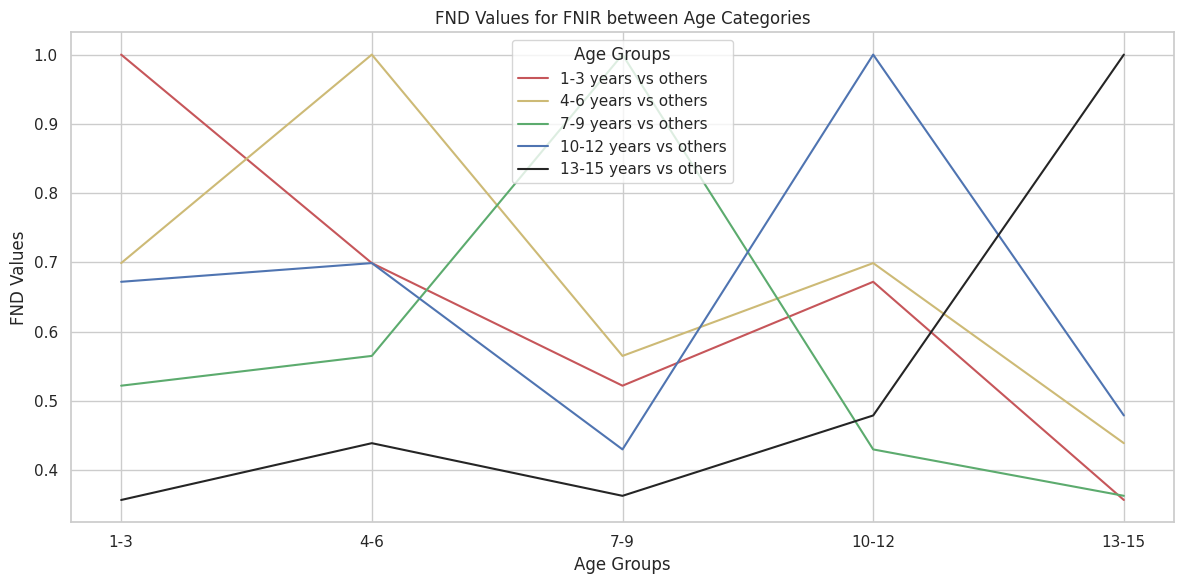

In [73]:
# # import pandas as pd
# # import matplotlib.pyplot as plt
# # import seaborn as sns

# # # Define age categories and labels
# # age_categories = ['1_3', '4_6', '7_9', '10_12', '13_15']
# # age_labels = ['1-3', '4-6', '7-9', '10-12', '13-15']

# # # Define FND values
# # FND_values = {
# #     '1_3': FND_1_3,
# #     '4_6': FND_4_6,
# #     '7_9': FND_7_9,
# #     '10_12': FND_10_12,
# #     '13_15': FND_13_15
# # }

# # # Convert the data into a DataFrame for easier plotting
# # data = []
# # for key, values in FND_values.items():
# #     for i, value in enumerate(values):
# #         data.append([key, age_categories[i], value])

# # df = pd.DataFrame(data, columns=['Age Group', 'Comparison Age Group', 'FND Value'])

# # # Map the age categories to their labels for better readability
# # age_map = dict(zip(age_categories, age_labels))
# # df['Age Group'] = df['Age Group'].map(age_map)
# # df['Comparison Age Group'] = df['Comparison Age Group'].map(age_map)

# # # Define custom colors
# # custom_colors = {
# #     '1-3': '#C6565A',  # Muted red
# #     '4-6': '#CDBA76',  # Muted gold
# #     '7-9': '#5CAB6E',  # Muted green
# #     '10-12': '#4F74B1',  # Muted blue
# #     '13-15': '#252525'  # Muted gray
# # }

# # # Plotting using seaborn
# # sns.set(style="whitegrid")
# # plt.figure(figsize=(12, 6))

# # # Plotting each age group with custom colors
# # for age_group in age_labels:
# #     subset = df[df['Age Group'] == age_group]
# #     plt.plot(subset['Comparison Age Group'], subset['FND Value'], marker='o', label=f'{age_group} years vs others', color=custom_colors[age_group])

# # plt.xlabel('Age Groups')
# # plt.ylabel('FND Values')
# # plt.title('FND Values for FNIR between Age Categories')
# # plt.legend(title='Age Groups')
# # plt.tight_layout()
# # plt.show()
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Define age categories and labels
# age_categories = ['1_3', '4_6', '7_9', '10_12', '13_15']
# age_labels = ['1-3', '4-6', '7-9', '10-12', '13-15']

# # Define FND values


# # Convert the data into a DataFrame for easier plotting
# data = []
# for key, values in FND_values.items():
#     for i, value in enumerate(values):
#         data.append([key, age_categories[i], value])

# df = pd.DataFrame(data, columns=['Age Group', 'Comparison Age Group', 'FND Value'])

# # Map the age categories to their labels for better readability
# age_map = dict(zip(age_categories, age_labels))
# df['Age Group'] = df['Age Group'].map(age_map)
# df['Comparison Age Group'] = df['Comparison Age Group'].map(age_map)

# # Define custom colors
# custom_colors = {
#     '1-3': '#C6565A',  # Muted red
#     '4-6': '#CDBA76',  # Muted gold
#     '7-9': '#5CAB6E',  # Muted green
#     '10-12': '#4F74B1',  # Muted blue
#     '13-15': '#252525'  # Muted gray
# }

# # Plotting using seaborn
# sns.set(style="whitegrid")
# plt.figure(figsize=(12, 6))

# # Plotting each age group with custom colors
# for age_group in age_labels:
#     subset = df[df['Age Group'] == age_group]
#     plt.plot(subset['Comparison Age Group'], subset['FND Value'], label=f'{age_group} years vs others', color=custom_colors[age_group])
#     # Plot markers separately, skipping the points where FND Value is 1
#     for x, y in zip(subset['Comparison Age Group'], subset['FND Value']):
#         if y > 1.1:
#             plt.plot(x, y, 'o', color=custom_colors[age_group])

# plt.xlabel('Age Groups')
# plt.ylabel('FND Values')
# plt.title('FND Values for FNIR between Age Categories')
# plt.legend(title='Age Groups')
# plt.tight_layout()
# plt.show()


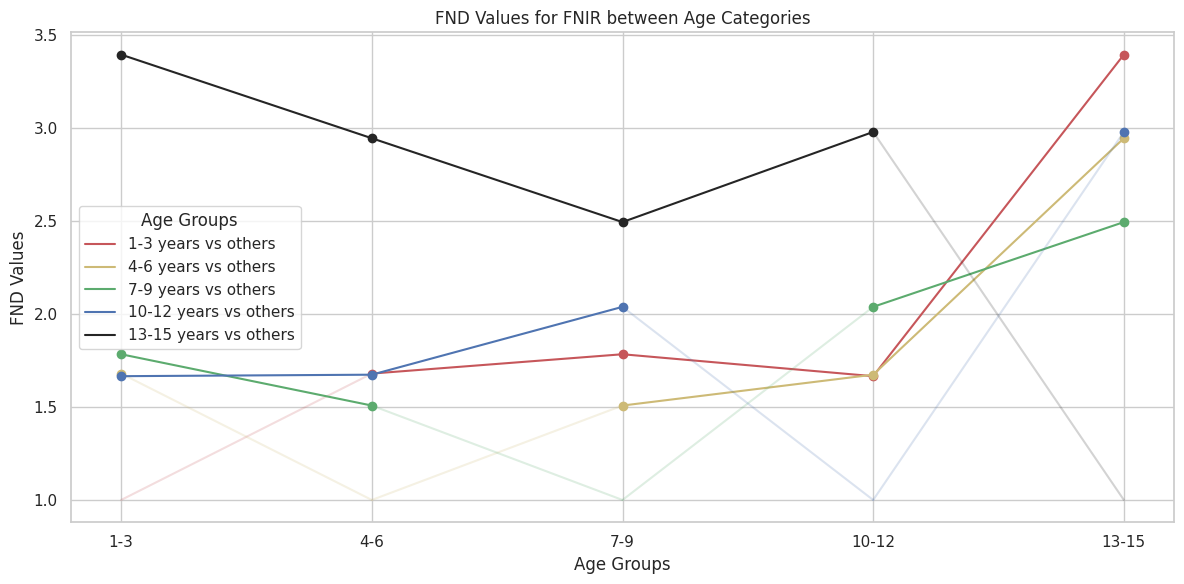

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define age categories and labels
age_categories = ['1_3', '4_6', '7_9', '10_12', '13_15']
age_labels = ['1-3', '4-6', '7-9', '10-12', '13-15']

# Define FND values
FND_values = {
    '1_3': FND_1_3,
    '4_6': FND_4_6,
    '7_9': FND_7_9,
    '10_12': FND_10_12,
    '13_15': FND_13_15
}

# Convert the data into a DataFrame for easier plotting
data = []
for key, values in FND_values.items():
    for i, value in enumerate(values):
        data.append([key, age_categories[i], value])

df = pd.DataFrame(data, columns=['Age Group', 'Comparison Age Group', 'FND Value'])

# Replace 1s with NaN to break the lines at those points
df['FND Value'] = df['FND Value'].replace(1, np.nan)

# Map the age categories to their labels for better readability
age_map = dict(zip(age_categories, age_labels))
df['Age Group'] = df['Age Group'].map(age_map)
df['Comparison Age Group'] = df['Comparison Age Group'].map(age_map)

# Define custom colors
custom_colors = {
    '1-3': '#C6565A',  # Muted red
    '4-6': '#CDBA76',  # Muted gold
    '7-9': '#5CAB6E',  # Muted green
    '10-12': '#4F74B1',  # Muted blue
    '13-15': '#252525'  # Muted gray
}

# Plotting using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plotting each age group with custom colors
for age_group in age_labels:
    subset = df[df['Age Group'] == age_group]

    # Plot the main lines without connections to 1s
    plt.plot(subset['Comparison Age Group'], subset['FND Value'], label=f'{age_group} years vs others', color=custom_colors[age_group])

    # Plot the muted connections separately
    for i in range(1, len(subset)):
        x_values = subset['Comparison Age Group'].iloc[i-1:i+1]
        y_values = subset['FND Value'].iloc[i-1:i+1].fillna(1)  # Temporarily fill NaN to plot muted line
        if 1 in y_values.values:
            plt.plot(x_values, y_values, color=custom_colors[age_group], alpha=0.2)

    # Plot markers separately, skipping the points where FND Value is NaN (formerly 1)
    for x, y in zip(subset['Comparison Age Group'], subset['FND Value']):
        if not pd.isna(y):
            plt.plot(x, y, 'o', color=custom_colors[age_group])

plt.xlabel('Age Groups')
plt.ylabel('FND Values')
plt.title('FND Values for FNIR between Age Categories')
plt.legend(title='Age Groups')
plt.tight_layout()
plt.show()


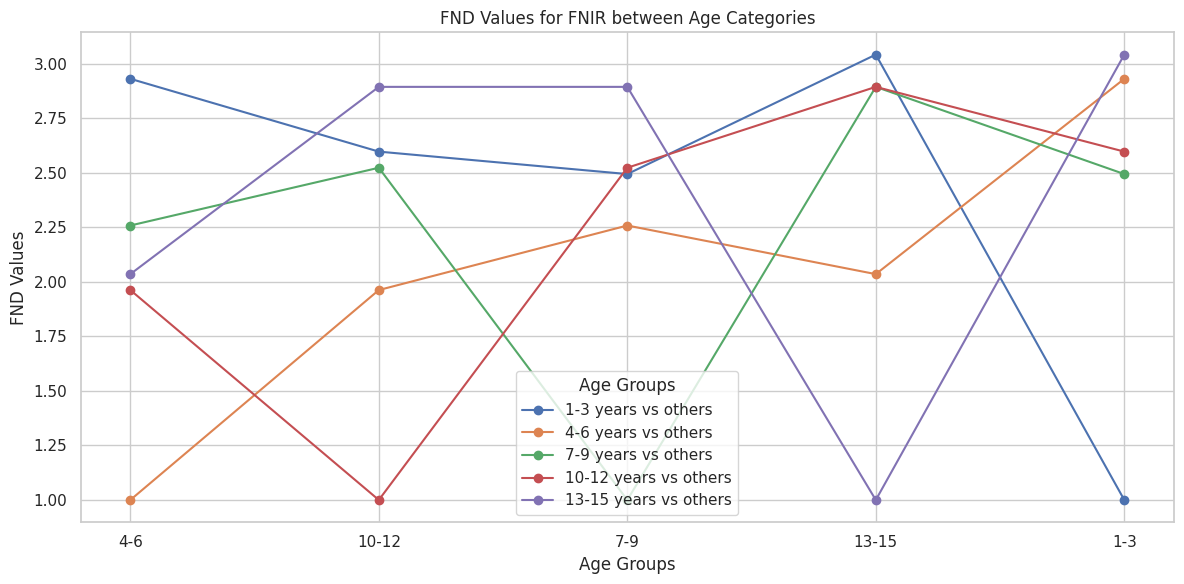

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define age categories and labels
age_categories = ['1_3', '4_6', '7_9', '10_12', '13_15']
age_labels = ['1-3', '4-6', '7-9', '10-12', '13-15']



# Convert the data into a DataFrame for easier plotting
data = []
for key, values in FND_values.items():
    for i, value in enumerate(values):
        data.append([key, age_categories[i], value])

df = pd.DataFrame(data, columns=['Age Group', 'Comparison Age Group', 'FND Value'])

# Map the age categories to their labels for better readability
age_map = dict(zip(age_categories, age_labels))
df['Age Group'] = df['Age Group'].map(age_map)
df['Comparison Age Group'] = df['Comparison Age Group'].map(age_map)

# Calculate the mean FND value for each Comparison Age Group
mean_fnd = df.groupby('Comparison Age Group')['FND Value'].mean().sort_values()

# Reorder the Comparison Age Groups based on the mean FND values
sorted_age_labels = mean_fnd.index.tolist()

# Plotting using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plotting each age group
for age_group in age_labels:
    subset = df[df['Age Group'] == age_group]
    subset = subset.set_index('Comparison Age Group').reindex(sorted_age_labels).reset_index()
    plt.plot(subset['Comparison Age Group'], subset['FND Value'], marker='o', label=f'{age_group} years vs others')

plt.xlabel('Age Groups')
plt.ylabel('FND Values')
# plt.yscale('log')
plt.title('FND Values for FNIR between Age Categories')
plt.legend(title='Age Groups')
plt.tight_layout()
plt.show()


In [ ]:


t_statistic, p_value = stats.ttest_rel(df_all_results['FNIR_1_3'], df_all_results['FNIR_4_6'])

# Output the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

In [6]:
t_statistic, p_value = stats.ttest_rel(df_all_results['FNIR_1_3'], df_all_results['FNIR_7_9'])

# Output the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: 3.7300136235728636
P-value: 0.004697369056507197


In [7]:
t_statistic, p_value = stats.ttest_rel(df_all_results['FNIR_1_3'], df_all_results['FNIR_10_12'])

# Output the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: 1.2379779821917338
P-value: 0.24704457286268658


In [8]:
t_statistic, p_value = stats.ttest_rel(df_all_results['FNIR_1_3'], df_all_results['FNIR_13_15'])

# Output the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: 9.289510359509109
P-value: 6.585017288153144e-06


In [ ]:
t_statistic, p_value = stats.ttest_rel(df_all_results['FNIR_10_12'], df_all_results['FNIR_13_15'])

# Output the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

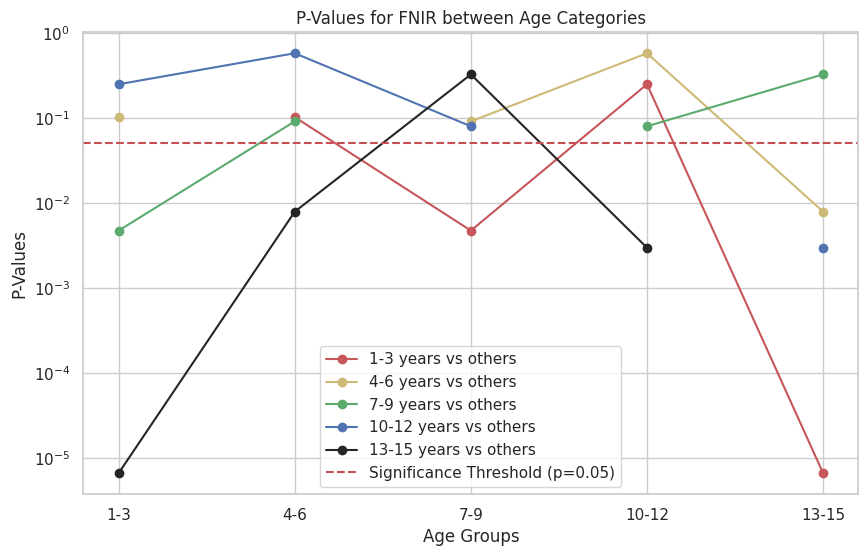

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming df_all_results is already loaded, if not, load it here
# df_all_results = pd.read_csv('path_to_your_data.csv')

# Define age categories for FNIR columns
age_categories = ['1_3', '4_6', '7_9', '10_12', '13_15']
age_labels = ['1-3', '4-6', '7-9', '10-12', '13-15']

# Define custom colors
custom_colors = {
    '1-3': '#C6565A',  # Muted red
    '4-6': '#CDBA76',  # Muted gold
    '7-9': '#5CAB6E',  # Muted green
    '10-12': '#4F74B1',  # Muted blue
    '13-15': '#252525'  # Muted gray
}

# Initialize an empty dictionary to store p-values
p_values_dict = {cat: [] for cat in age_categories}

# Calculate p-values between each pair of age categories
for i in range(len(age_categories)):
    for j in range(len(age_categories)):
        if i != j:
            t_statistic, p_value = stats.ttest_rel(df_all_results[f'FNIR_{age_categories[i]}'], df_all_results[f'FNIR_{age_categories[j]}'])
            p_values_dict[age_categories[i]].append(p_value)
        else:
            p_values_dict[age_categories[i]].append(None)

# Set the seaborn style
sns.set(style="whitegrid")

# Prepare to plot
plt.figure(figsize=(10, 6))

# Plot p-values for each age category pair
for i, cat in enumerate(age_categories):
    plt.plot(age_labels, p_values_dict[cat], marker='o', label=f'{cat.replace("_", "-")} years vs others', color=custom_colors[age_labels[i]])

# Add horizontal line at p-value = 0.05
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Threshold (p=0.05)')

# Add labels and title
plt.xlabel('Age Groups')
plt.ylabel('P-Values')
plt.title('P-Values for FNIR between Age Categories')
plt.legend()
plt.yscale('log')  # If you want to visualize small p-values better
plt.grid(True)

# Show plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming df_all_results is already loaded, if not, load it here
# df_all_results = pd.read_csv('path_to_your_data.csv')

# Define age categories for FNIR columns
age_categories = ['1_3', '4_6', '7_9', '10_12', '13_15']
age_labels = ['1-3', '4-6', '7-9', '10-12', '13-15']

# Initialize an empty dictionary to store p-values
p_values_dict = {cat: [] for cat in age_categories}

# Calculate p-values between each pair of age categories
for i in range(len(age_categories)):
    for j in range(len(age_categories)):
        if i != j:
            t_statistic, p_value = stats.ttest_rel(df_all_results[f'FND_{age_categories[i]}'], df_all_results[f'FND_{age_categories[j]}'])
            p_values_dict[age_categories[i]].append(p_value)
        else:
            p_values_dict[age_categories[i]].append(None)

# Set the seaborn style
sns.set(style="whitegrid")

# Prepare to plot
plt.figure(figsize=(10, 6))

# Plot p-values for each age category pair
for i, cat in enumerate(age_categories):
    plt.plot(age_labels, p_values_dict[cat], marker='o', label=f'{cat.replace("_", "-")} years vs others')

# Add horizontal line at p-value = 0.05
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Threshold (p=0.05)')

# Add labels and title
plt.xlabel('Age Groups')
plt.ylabel('P-Values')
plt.title('P-Values for FNIR between Age Categories')
plt.legend()
plt.yscale('log')  # If you want to visualize small p-values better
plt.grid(True)

# Show plot
plt.show()


In [ ]:
def process_iterations(key_pattern, output_file, sim_mat_dict, iteration_range=range(1, 11)):
    # Initialize the list to hold the arrays
    iterations = []

    # Loop to access each array and append it to the list
    for i in iteration_range:
        key = f'{key_pattern}_{i}'
        if key in sim_mat_dict:
            iterations.append(sim_mat_dict[key])

    # Concatenate all arrays into one big array
    iterations_all = np.concatenate(iterations)
    iterations_all = pd.DataFrame(iterations_all)

    # Save to CSV
    iterations_all.to_csv(output_file, index=False)

    # Print the length of the big array
    print(len(iterations_all))


In [ ]:
# age = ['1-3','4-6','7-9','10-12','13-15']
# numbers = [1,2,3]

# process_iterations('sim_mat_c_enrolled_iteration', f'sim_mat_c_enrolled_iterations_all_ada_2_3_{age[0]}.csv', sim_mat_dict_all_magface_ex2_3_1)
# process_iterations('sim_mat_a_enrolled_iteration', f'sim_mat_a_enrolled_iterations_all_ada_2_3_{age[0]}.csv', sim_mat_dict_all_magface_ex2_3_1)
# process_iterations('sim_mat_c_non_enrolled_iteration', f'sim_mat_c_non_enrolled_iterations_all_ada_2_3_{age[0]}.csv', sim_mat_dict_all_magface_ex2_3_1)
# process_iterations('sim_mat_a_non_enrolled_iteration', f'sim_mat_a_non_enrolled_iterations_all_ada_2_3_{age[0]}.csv', sim_mat_dict_all_magface_ex2_3_1)

# process_iterations('sim_mat_c_enrolled_iteration', f'sim_mat_c_enrolled_iterations_all_ada_2_3_{age[1]}.csv', sim_mat_dict_all_magface_ex2_3_1)
# process_iterations('sim_mat_a_enrolled_iteration', f'sim_mat_a_enrolled_iterations_all_ada_2_3_{age[1]}.csv', sim_mat_dict_all_magface_ex2_3_1)
# process_iterations('sim_mat_c_non_enrolled_iteration', f'sim_mat_c_non_enrolled_iterations_all_ada_2_3_{age[1]}.csv', sim_mat_dict_all_magface_ex2_3_1)
# process_iterations('sim_mat_a_non_enrolled_iteration', f'sim_mat_a_non_enrolled_iterations_all_ada_2_3_{age[1]}.csv', sim_mat_dict_all_magface_ex2_3_1)

# process_iterations('sim_mat_c_enrolled_iteration', f'sim_mat_c_enrolled_iterations_all_ada_2_3_{age[2]}.csv', sim_mat_dict_all_magface_ex2_3_2)
# process_iterations('sim_mat_a_enrolled_iteration', f'sim_mat_a_enrolled_iterations_all_ada_2_3_{age[2]}.csv', sim_mat_dict_all_magface_ex2_3_2)
# process_iterations('sim_mat_c_non_enrolled_iteration', f'sim_mat_c_non_enrolled_iterations_all_ada_2_3_{age[2]}.csv', sim_mat_dict_all_magface_ex2_3_2)
# process_iterations('sim_mat_a_non_enrolled_iteration', f'sim_mat_a_non_enrolled_iterations_all_ada_2_3_{age[2]}.csv', sim_mat_dict_all_magface_ex2_3_2)

# process_iterations('sim_mat_c_enrolled_iteration', f'sim_mat_c_enrolled_iterations_all_ada_2_3_{age[3]}.csv', sim_mat_dict_all_magface_ex2_3_2)
# process_iterations('sim_mat_a_enrolled_iteration', f'sim_mat_a_enrolled_iterations_all_ada_2_3_{age[3]}.csv', sim_mat_dict_all_magface_ex2_3_2)
# process_iterations('sim_mat_c_non_enrolled_iteration', f'sim_mat_c_non_enrolled_iterations_all_ada_2_3_{age[3]}.csv', sim_mat_dict_all_magface_ex2_3_2)
# process_iterations('sim_mat_a_non_enrolled_iteration', f'sim_mat_a_non_enrolled_iterations_all_ada_2_3_{age[3]}.csv', sim_mat_dict_all_magface_ex2_3_2)

# process_iterations('sim_mat_c_enrolled_iteration', f'sim_mat_c_enrolled_iterations_all_ada_2_3_{age[4]}.csv', sim_mat_dict_all_magface_ex2_3_3)
# process_iterations('sim_mat_a_enrolled_iteration', f'sim_mat_a_enrolled_iterations_all_ada_2_3_{age[4]}.csv', sim_mat_dict_all_magface_ex2_3_3)
# process_iterations('sim_mat_c_non_enrolled_iteration', f'sim_mat_c_non_enrolled_iterations_all_ada_2_3_{age[4]}.csv', sim_mat_dict_all_magface_ex2_3_3)
# process_iterations('sim_mat_a_non_enrolled_iteration', f'sim_mat_a_non_enrolled_iterations_all_ada_2_3_{age[4]}.csv', sim_mat_dict_all_magface_ex2_3_3)


# age = ['1-3', '4-6', '7-9', '10-12', '13-15']
# datasets = {
#     0: sim_mat_dict_all_magface_ex2_3_1,
#     1: sim_mat_dict_all_magface_ex2_3_1,
#     2: sim_mat_dict_all_magface_ex2_3_2,
#     3: sim_mat_dict_all_magface_ex2_3_2,
#     4: sim_mat_dict_all_magface_ex2_3_3
# }

# key_patterns = [
#     'sim_mat_c_enrolled_iteration',
#     'sim_mat_a_enrolled_iteration',
#     'sim_mat_c_non_enrolled_iteration',
#     'sim_mat_a_non_enrolled_iteration'
# ]

# for idx, age_group in enumerate(age):
#     for key_pattern in key_patterns:
#         output_file = f'{key_pattern.split("_")[2]}_iterations_all_ada_2_3_{age_group}.csv'
#         process_iterations(key_pattern, output_file, datasets[idx])


23162
20602
423738
634410


In [ ]:
import pandas as pd
import numpy as np

def process_iterations(key_pattern, output_file, sim_mat_dict, iteration_range=range(1, 11)):
    iterations = []
    for i in iteration_range:
        key = f'{key_pattern}_{i}'
        if key in sim_mat_dict:
            iterations.append(sim_mat_dict[key])
    iterations_all = np.concatenate(iterations)
    iterations_all = pd.DataFrame(iterations_all)
    iterations_all.to_csv(output_file, index=False)
    print(len(iterations_all))

def descriptive_statistics(mated_scores, nonmated_scores):
    # Placeholder for your descriptive statistics function
    # Replace this with actual implementation
    stats = {
        "mean_mated": np.mean(mated_scores),
        "mean_nonmated": np.mean(nonmated_scores),
        "std_mated": np.std(mated_scores),
        "std_nonmated": np.std(nonmated_scores)
    }
    return pd.DataFrame([stats])

age = ['1-3', '4-6', '7-9', '10-12', '13-15']
datasets = {
    0: sim_mat_dict_all_magface_ex2_3_1,
    1: sim_mat_dict_all_magface_ex2_3_1,
    2: sim_mat_dict_all_magface_ex2_3_2,
    3: sim_mat_dict_all_magface_ex2_3_2,
    4: sim_mat_dict_all_magface_ex2_3_3
}

key_patterns = [
    'sim_mat_c_enrolled_iteration',
    'sim_mat_a_enrolled_iteration',
    'sim_mat_c_non_enrolled_iteration',
    'sim_mat_a_non_enrolled_iteration'
]

for idx, age_group in enumerate(age):
    for key_pattern in key_patterns:
        output_file = f'{key_pattern}_all_ada_2_3_{age_group}.csv'
        process_iterations(key_pattern, output_file, datasets[idx])

loaded_arrays = {}

for age_group in age:
    for key_pattern in key_patterns:
        filename = f'{key_pattern}_all_ada_2_3_{age_group}.csv'
        array_name = f'{key_pattern}_all_ada_{age_group.replace("-", "_")}'
        loaded_arrays[array_name] = pd.read_csv(filename).values.flatten()

# Example usage with descriptive statistics
results = {}

for age_group in age:
    mated_key = f'sim_mat_a_enrolled_iteration_all_ada_{age_group.replace("-", "_")}'
    nonmated_key = f'sim_mat_a_non_enrolled_iteration_all_ada_{age_group.replace("-", "_")}'
    if mated_key in loaded_arrays and nonmated_key in loaded_arrays:
        mated_scores = loaded_arrays[mated_key]
        nonmated_scores = loaded_arrays[nonmated_key]
        stats_system_df = descriptive_statistics(mated_scores, nonmated_scores)
        results[f'stats_system_{age_group.replace("-", "_")}'] = stats_system_df
        display(stats_system_df)

# Access specific results if needed
stats_system_1_3 = results['stats_system_1_3']
stats_system_4_6 = results['stats_system_4_6']
stats_system_7_9 = results['stats_system_7_9']
stats_system_10_12 = results['stats_system_10_12']
stats_system_13_15 = results['stats_system_13_15']


23162
20602
423738
634410
23162
20602
423738
634410
17992
13144
677502
501942
17992
13144
677502
501942
7022
23162
274113
423738


,mean_mated,mean_nonmated,std_mated,std_nonmated
0,0.492458,0.047669,0.173575,0.100277


,mean_mated,mean_nonmated,std_mated,std_nonmated
0,0.492458,0.047669,0.173575,0.100277


,mean_mated,mean_nonmated,std_mated,std_nonmated
0,0.516806,0.046307,0.185407,0.096341


,mean_mated,mean_nonmated,std_mated,std_nonmated
0,0.516806,0.046307,0.185407,0.096341


,mean_mated,mean_nonmated,std_mated,std_nonmated
0,0.440273,0.066647,0.177404,0.105072


# loader sim scores

In [ ]:
sim_mat_c_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_c_enrolled_iterations_all_ada_2_1.csv')).values.flatten()
sim_mat_a_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_a_enrolled_iterations_all_ada_2_1.csv')).values.flatten()
sim_mat_c_non_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_c_non_enrolled_iterations_all_ada_2_1.csv')).values.flatten()
sim_mat_a_non_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_a_non_enrolled_iterations_all_ada_2_1.csv')).values.flatten()


In [ ]:
from scipy.stats import describe, gaussian_kde
import math

def descriptive_statistics(mated_scores, nonmated_scores):
    stats_labels = ["Observations", "Minimum", "Maximum", "Mean", "St. Dev.", "Skewness", "Ex. Kurtosis"]
    mated_stats = describe(mated_scores)
    mated_stats = [mated_stats.nobs, mated_stats.minmax[0], mated_stats.minmax[1], mated_stats.mean, math.sqrt(mated_stats.variance), mated_stats.skewness, mated_stats.kurtosis]
    nonmated_stats = describe(nonmated_scores)
    nonmated_stats = [nonmated_stats.nobs, nonmated_stats.minmax[0], nonmated_stats.minmax[1], nonmated_stats.mean, math.sqrt(nonmated_stats.variance), nonmated_stats.skewness, nonmated_stats.kurtosis]

    stats_system_df = pd.DataFrame(np.array([stats_labels, mated_stats, nonmated_stats]).T, columns=["Statistic", "Mated", "Non-mated"])
    stats_system_df = stats_system_df.astype({"Statistic": str, "Mated": float, "Non-mated": float})
    return stats_system_df

In [ ]:
mated_scores1 = sim_mat_a_enrolled_iterations_all_ada
nonmated_scores1 = sim_mat_a_non_enrolled_iterations_all_ada
scores_type1 = "similarity"
stats_system1_df = descriptive_statistics(mated_scores1, nonmated_scores1)
display(stats_system1_df)

In [ ]:
mated_scores2 = sim_mat_c_enrolled_iterations_all_ada
nonmated_scores2 = sim_mat_c_non_enrolled_iterations_all_ada
scores_type2 = "similarity"
stats_system2_df = descriptive_statistics(mated_scores2, nonmated_scores2)
display(stats_system2_df)

In [ ]:
mated_colour = "green"
mated_label = "Mated scores"
nonmated_colour = "red"
nonmated_label = "Non-mated scores"

figure_size = (12,6)
alpha_shade = 0.25
alpha_fill = 1.0
linewidth = 2
legend_loc = "upper left"
legend_anchor = (1.0, 1.02)
legend_cols = 1
legend_fontsize = 12
label_fontsize = 16

threshold_colour = "black"
threshold_style = "--"
round_digits = 5
sns.set(style="white", palette="muted", color_codes=True)
plt.rc("axes", axisbelow=True)

In [ ]:

# import matplotlib.pyplot as plt
# import numpy as np

# def plot_histogram(mated_scores, nonmated_scores, normalise=True, savename=None, title="Histogram"):
#     def normalise_scores(distribution):
#         return np.ones_like(distribution) / len(distribution)

#     mated_mean = np.mean(mated_scores)

#     plt.figure(figsize=(10, 6))  # Replace 'figure_size' with a specific size if not defined

#     if normalise:
#         plt.hist(mated_scores, bins=50, weights=normalise_scores(mated_scores), color='green', alpha=0.5, label='Mated Scores')  # Replace 'mated_label' with 'Mated Scores'
#         plt.hist(nonmated_scores, bins=30, weights=normalise_scores(nonmated_scores), color='red', alpha=0.5, label='Non-mated Scores')  # Replace 'nonmated_label' with 'Non-mated Scores'
#         ylabel = "Probability Density"
#     else:
#         plt.hist(mated_scores, bins=50, color='green', alpha=0.5, label='Mated Scores')
#         plt.hist(nonmated_scores, bins=30, color='red', alpha=0.5, label='Non-mated Scores')
#         ylabel = "Count"

#     plt.axvline(mated_mean, color='darkgreen', linestyle='--', linewidth=2, label=f'Mated Mean: {mated_mean:.2f}')

#     plt.xlabel("Comparison Score", size=12)  # Replace 'label_fontsize' with 12 or any preferred size
#     plt.ylabel(ylabel, size=12)  # Replace 'label_fontsize' with 12 or any preferred size
#     plt.title(title, size=14)  # Title added here
#     plt.grid(True)
#     plt.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1, fontsize=10)  # Adjust legend parameters as needed

#     if savename is not None:
#         plt.savefig(savename, bbox_inches="tight")
#         plt.cla()
#         plt.clf()
#         plt.close()
#     else:
#         plt.show()


In [ ]:
from DET_utils.DET_plots import *



plot_histogram(mated_scores1, nonmated_scores1, normalise=True, title = 'Adults - AdaFace ex. 2.1 ')


In [ ]:
plot_histogram(mated_scores2, nonmated_scores2, normalise=True, title = 'Children - AdaFace ex. 2.1 ')


# DET curves


In [ ]:
from DET_utils.DET_plots import *

In [ ]:
# mated_kde, mated_pos, mated_min, mated_max = get_kde(mated_scores1)
# nonmated_kde, nonmated_pos, nonmated_min, nonmated_max = get_kde(nonmated_scores1)
# plt.figure(figsize=figure_size)
# plt.plot(mated_pos, mated_kde(mated_pos), linewidth=linewidth, color=mated_colour, label=mated_label)
# plt.plot(nonmated_pos, nonmated_kde(nonmated_pos), linewidth=linewidth, color=nonmated_colour, label=nonmated_label)
# plt.xlabel("Score", size=label_fontsize)
# plt.ylabel("Probability Density", size=label_fontsize)
# plt.grid(True)
# plt.legend(loc=legend_loc, bbox_to_anchor=legend_anchor, ncol=legend_cols, fontsize=legend_fontsize)
# plt.show()

In [ ]:
d_prime_system1 = d_prime(mated_scores1, nonmated_scores1)
print("d' child =", round(d_prime_system1, round_digits))

d_prime_system2 = d_prime(mated_scores2, nonmated_scores2)
print("d' adult =", round(d_prime_system2, round_digits))

# d_prime_system3 = d_prime(mated_scores3, nonmated_scores3)
# print("d' canonical =", round(d_prime_system3, round_digits))


In [ ]:
threshold1 = df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
kde_with_threshold(mated_scores1, nonmated_scores1, scores_type1, threshold1)

In [ ]:
threshold2 = df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
kde_with_threshold(mated_scores2, nonmated_scores2, scores_type2, threshold2)

In [ ]:
system_name1 = 'Adults'
system_name2 = 'Children'

det = DET(biometric_evaluation_type='identification', abbreviate_axes=True, plot_eer_line=True, plot_title="Children vs adults")
det.x_limits = np.array([1e-4, .5])
det.y_limits = np.array([1e-4, .5])
det.x_ticks = np.array([1e-3, 1e-2, 5e-2, 20e-2, 40e-2])
det.x_ticklabels = np.array(['0.1', '1', '5', '20', '40'])
det.y_ticks = np.array([1e-3, 1e-2, 5e-2, 20e-2, 40e-2])
det.y_ticklabels = np.array(['0.1', '1', '5', '20', '40'])
det.create_figure()
det.plot(tar=adjust_scores_for_DET(mated_scores1, scores_type1), non=adjust_scores_for_DET(nonmated_scores1, scores_type1), label=system_name1)
det.plot(tar=adjust_scores_for_DET(mated_scores2, scores_type2), non=adjust_scores_for_DET(nonmated_scores2, scores_type2), label=system_name2)
det.legend_on(loc="upper right")
det.show()